# Домашняя работа №4

Для датасета kaggle, Credit Card Fraud Detection. https://www.kaggle.com/mlg-ulb/creditcardfraud 

**1. Загрузить датасет**

In [4]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline


In [5]:
url=r"C:\Users\af.sabirova\Desktop\pyda\2 модуль ДЗ\HW_4\creditcard.csv"
data=pd.read_csv(url)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [19]:
data.shape

(284807, 31)

**2. Посмотреть отсутствующие значения (какое количество Nan элементов).**

In [14]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**3. Основное таргет значение: 1 - сделка была обманной, 0 - честной. Сделать график barplot для этих двух классов из колонки 'Class'. Посчитать количество элементов в классе 1 и в классе 2.**

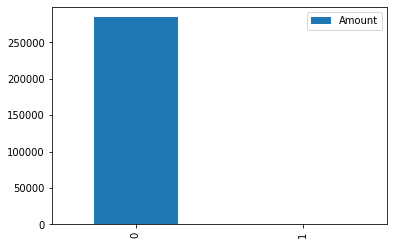

In [22]:
groupedvalues=data.groupby('Class').count().sort_values(by='Amount', ascending=False).reset_index()
groupedvalues.plot(kind='bar', y='Amount')

In [29]:
groupedvalues.reindex(columns = ['Class','Amount'])

,Class,Amount
0,0,284315
1,1,492


[284315, 492]


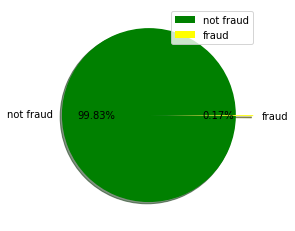

In [39]:
size = list(data['Class'].value_counts())
print(size)
colors = ['green', 'yellow']
labels = "not fraud", "fraud"
explode = [0, 0.2]

plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%', explode = explode, shadow = True)
plt.legend()
plt.show()

**4. Сколько денег было использовано в обманных операциях, а сколько - в нормальных операциях?** Сделать частотный график по колонке Amount для колонки Class по двум независимым выборкам: обманная операция, нормальная операция

In [46]:
class_1=data[data['Class']==1]

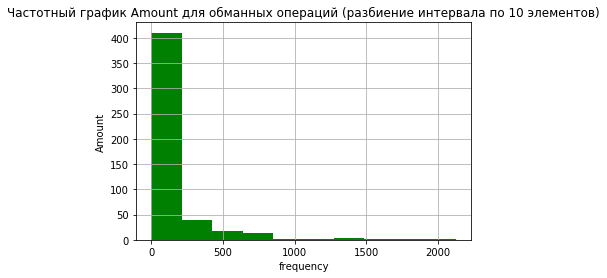

In [41]:
n, bins, patches = plt.hist(class_1['Amount'], 10, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('Amount')
plt.title('Частотный график Amount для обманных операций (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

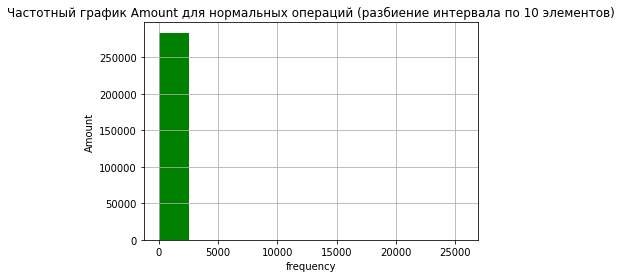

In [54]:
class_0 = data[data['Class']==0]
n, bins, patches = plt.hist(class_0['Amount'], 10, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('Amount')
plt.title('Частотный график Amount для нормальных операций (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

**5. Построить графики histograms для всех значений**

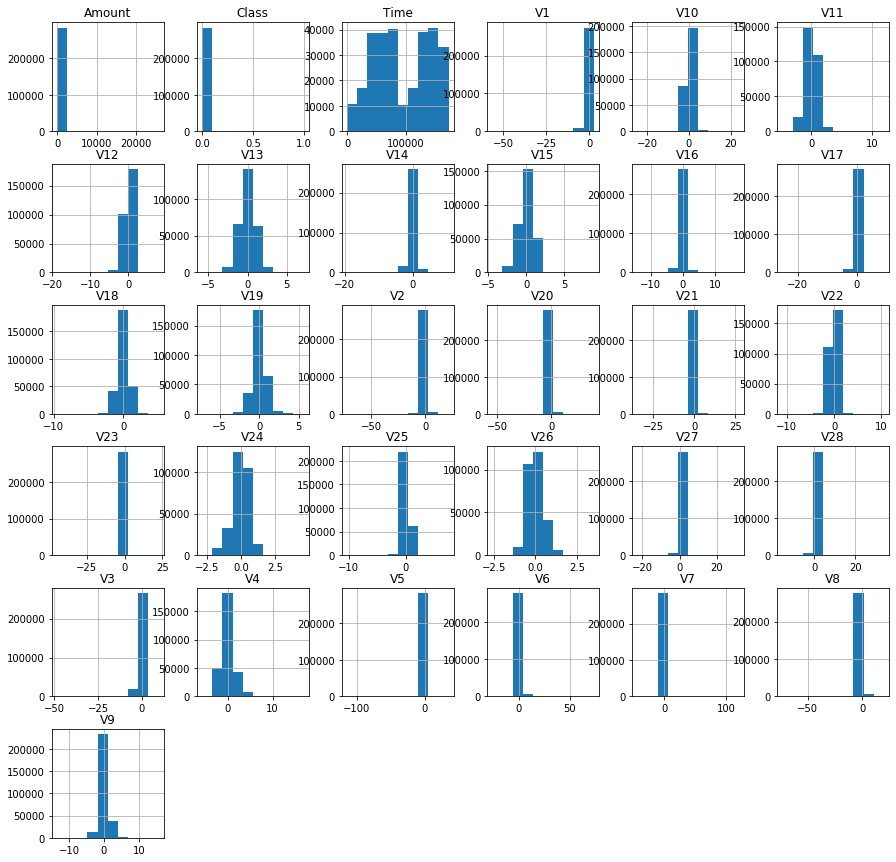

In [4]:
data.hist(figsize=(15,15))
plt.show()

**6. Построить матрицу корреляций для всех значений**

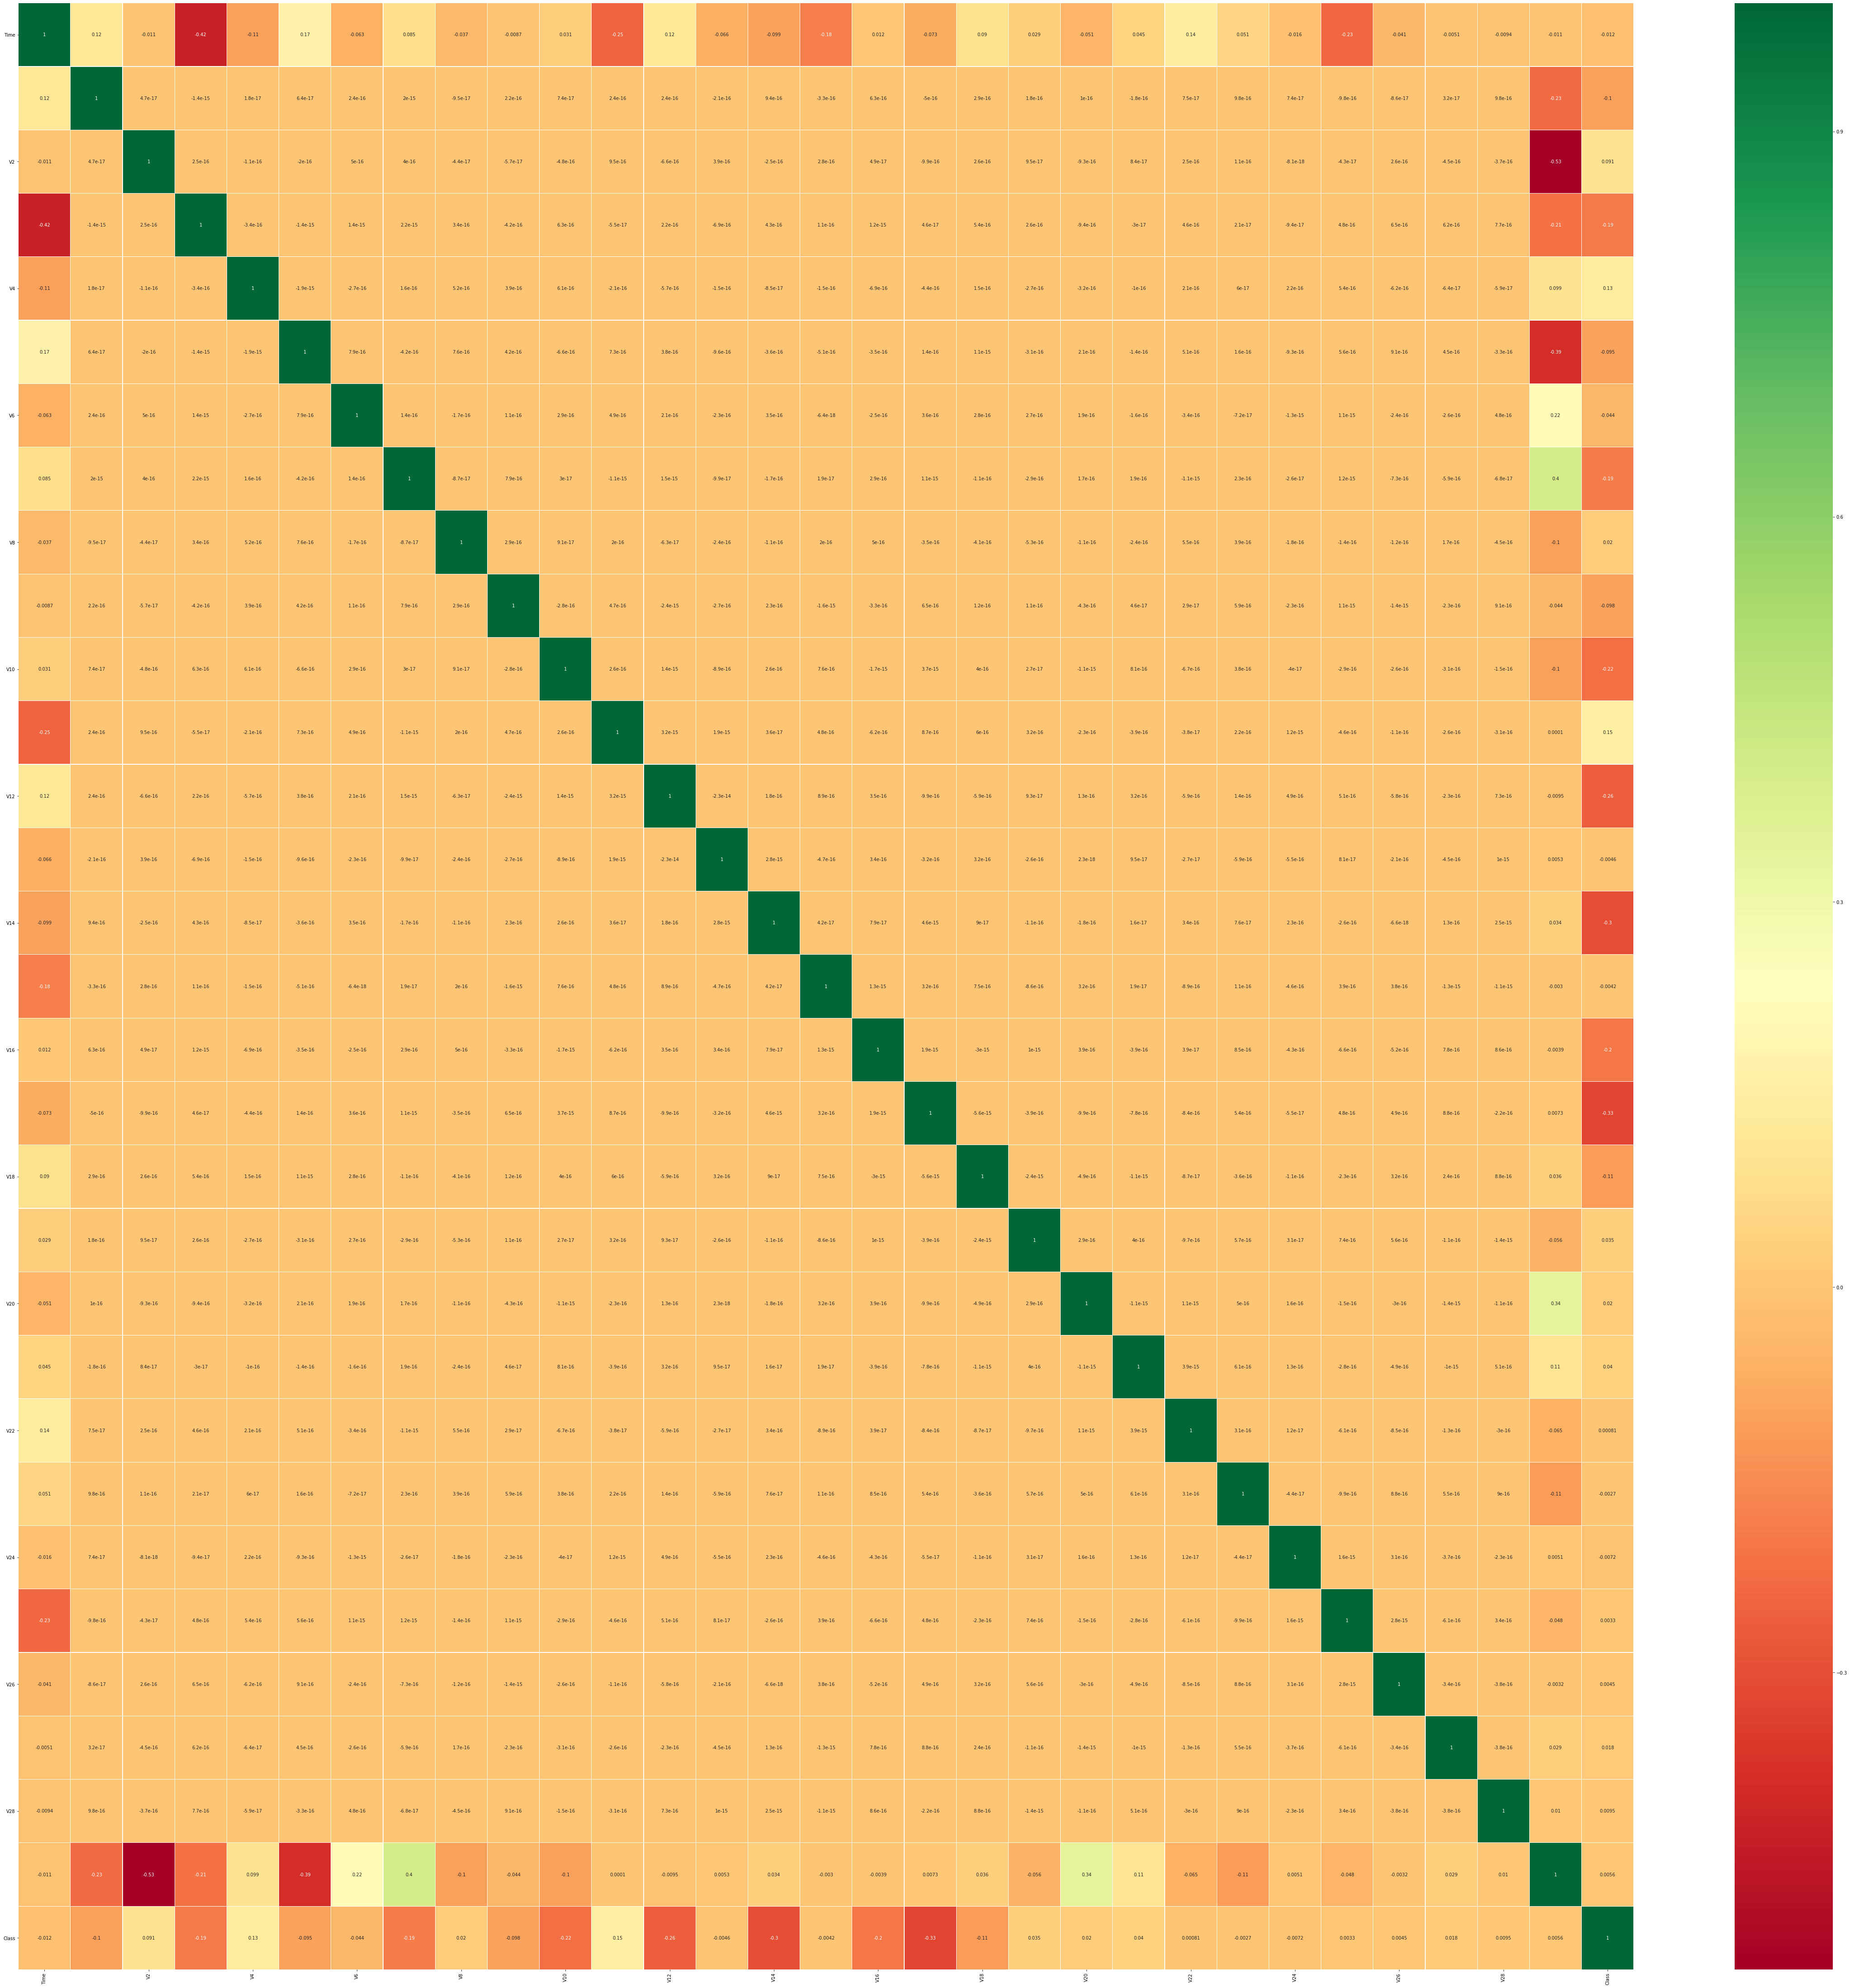

In [16]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(80,80)
plt.show()

**7. Выбрать несколько элементов исходя из матрицы корреляций для предсказания таргет значения Class. Построить модель логистической регрессии. Разделить датасет на 80% тренировочных данных и 20% тестовых данных. Для fit метода использовать тренировочные данные, проверить качество модели на тестовых данных. Почему модель дает такой результат?**

Для разделения на тренировочный датасет и тестовый датасет можно использовать функцию  из sklearn:

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [21]:
# разделим датасет на зависимые переменные и таргет значение (X и Y)
y = data.Class
X = data.drop('Class', axis=1)

# разделим на тренировочные данные и на тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
from sklearn.metrics import classification_report
model = LogisticRegression(solver='liblinear').fit(X_train, y_train)

model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71070
           1       0.90      0.64      0.75       132

    accuracy                           1.00     71202
   macro avg       0.95      0.82      0.88     71202
weighted avg       1.00      1.00      1.00     71202



In [ ]:
#Такой результат получился, потому что данные несбалансированы

**8. Чтобы уравновесить датасет по классу Class, выберем одинаковое количество элементов из датасета по классу.** Необходимо посчитать минимальное количество (N) элементов, посчитанное в задаче 3. Выбрать N элементов рандомно из класса, имеющего бОльшее количество элементов, и все элементы из класса имеющего меньшее количество. Таким образом, мы уравновесим датасет по количеству элементов. Смоделировать логистической регрессию на полученном датасете. Посчитать качество модели. Получилось ли улучшить модель? Если да, то засчет чего?

In [29]:
from sklearn.utils import resample
X = pd.concat([X_train, y_train], axis=1)


not_fraud = X[X.Class==0]
fraud = X[X.Class==1]


not_fraud_downsampled = resample(not_fraud,
                                replace = False, 
                                n_samples = len(fraud), 
                                random_state = 27) 


downsampled = pd.concat([not_fraud_downsampled, fraud])


downsampled.Class.value_counts()

1    360
0    360
Name: Class, dtype: int64

In [30]:
y_train = downsampled.Class
X_train = downsampled.drop('Class', axis=1)

undersampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

undersampled_pred = undersampled.predict(X_test)

print(classification_report(y_test, undersampled_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71070
           1       0.06      0.86      0.12       132

    accuracy                           0.98     71202
   macro avg       0.53      0.92      0.55     71202
weighted avg       1.00      0.98      0.99     71202



In [ ]:
#Уменьшение количества данных привело к ухудшению модели, в связи с этим данным метод балансировки не может быть принят. 

**9. Написать модель RandomForestClassifier на данный датасет и сравнить результаты с логистической регрессией. Почему результаты получились лучше (или хуже). Тренировочные и тестовые данные выбираем одинаковые (те же, что и для логистической регрессии), полученные на шаге 7.**

In [36]:
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              AdaBoostClassifier)


model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)
print(model.score(X_test, y_test))


0.983764500997163


In [ ]:
#RandomForest дал точность предсказаний - 98,4%. Результат получился лучше, так как данная модель хорошо предсказывает 
#несбалансированные данные за счет воспроизводства множества вариантов деревьев решений, которые в целом дают хороший результат